In [1]:
import numpy as np
import pandas as pd
import joblib
import pickle
from sklearn.preprocessing import MinMaxScaler

In [2]:
def load_features_from_file(filepath):
    data = np.genfromtxt(filepath, delimiter=",")
    X = data[:, :-1]
    y = data[:, -1]

    return (X, y)

# Remove highly correlated features
def remove_highly_correlated_features(X, threshold=0.95):
    corr_matrix = pd.DataFrame(X).corr().abs()
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    to_drop = [column for column in upper.columns if any(upper[column] > threshold)]
    X_reduced = np.delete(X, to_drop, axis=1)
    return X_reduced, to_drop

In [3]:
X_train, y_train = load_features_from_file("../2. Feature Selection & Extraction/Saved Features/Final_features_training.csv")
X_val, y_val = load_features_from_file("../2. Feature Selection & Extraction/Saved Features/Final_features_validation.csv")

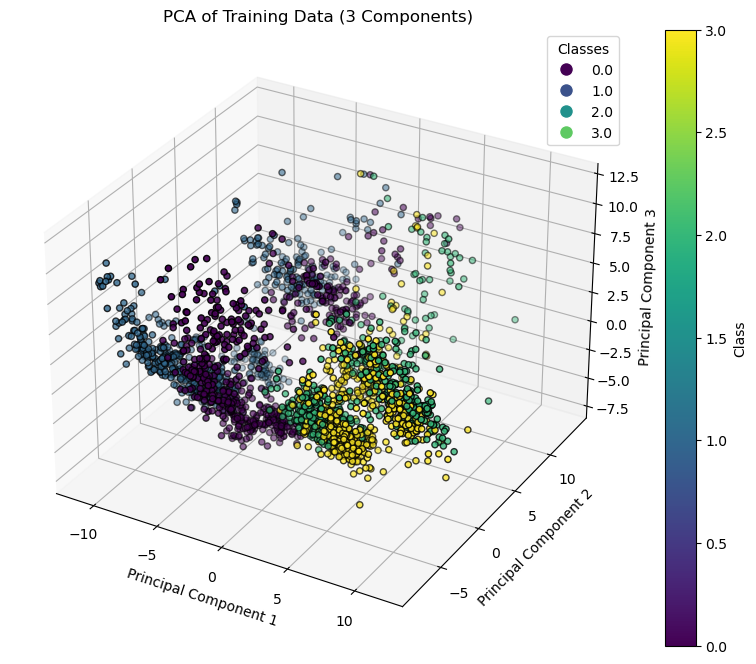

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Assuming X_train and y_train are already loaded

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Initialize PCA with 3 components
pca = PCA(n_components=3)

# Fit PCA on the scaled training data and transform it
X_train_pca = pca.fit_transform(X_train_scaled)

# Plot the PCA-transformed data in 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
scatter = ax.scatter(X_train_pca[:, 0], X_train_pca[:, 1], X_train_pca[:, 2], c=y_train, cmap='viridis', edgecolor='k')

# Axis labels
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('PCA of Training Data (3 Components)')

# Add legend
classes = np.unique(y_train)
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=plt.cm.viridis(i / len(classes)), markersize=10, label=class_label)
           for i, class_label in enumerate(classes)]
ax.legend(handles=handles, title='Classes')

# Add color bar
fig.colorbar(scatter, ax=ax, label='Class')

plt.show()
